In [1]:
pip install pyodbc

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd 
import numpy as np 
import pyodbc 

import warnings
warnings.filterwarnings("ignore")

In [2]:
conn_str = (
    'DRIVER={ODBC Driver 17 for SQL Server};'
    'SERVER=DESKTOP-ID5LP5C;'
    'DATABASE=INSTANT;'
    'Trusted_Connection=yes;'
)


In [3]:
#to connect python to sql
conn = pyodbc.connect(conn_str)

In [4]:
print(pyodbc.drivers())

['SQL Server', 'SQL Server Native Client RDA 11.0', 'ODBC Driver 17 for SQL Server']


In [5]:
#to read sql data
query = "SELECT * FROM dbo.shopping_trends"
df = pd.read_sql(query, conn)

df 

,Customer_ID,Age,Gender,Item_Purchased,Category,Purchase_Amount_USD,Location,Size,Color,Season,Review_Rating,Subscription_Status,Payment_Method,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Preferred_Payment_Method,Frequency_of_Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item_Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase_Amount_USD       3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review_Rating             3900 non-null   float64
 11  Subscription_Status       3900 non-null   object 
 12  Payment_Method            3900 non-null   object 
 13  Shipping_Type             3900 non-null   object 
 14  Discount

In [7]:
df.columns

Index(['Customer_ID', 'Age', 'Gender', 'Item_Purchased', 'Category',
       'Purchase_Amount_USD', 'Location', 'Size', 'Color', 'Season',
       'Review_Rating', 'Subscription_Status', 'Payment_Method',
       'Shipping_Type', 'Discount_Applied', 'Promo_Code_Used',
       'Previous_Purchases', 'Preferred_Payment_Method',
       'Frequency_of_Purchases'],
      dtype='object')

<Axes: xlabel='Category', ylabel='Age'>

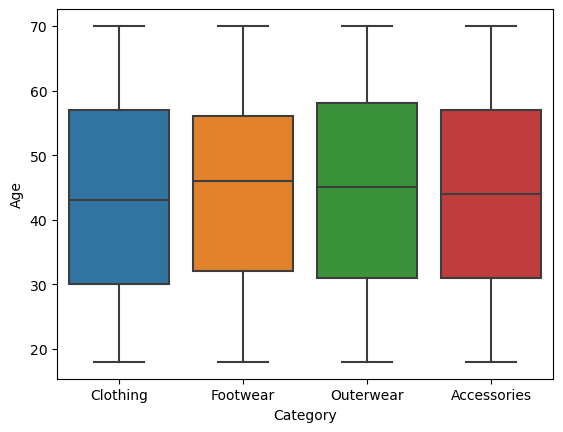

In [17]:
sns.boxplot(x='Category',y='Age',data=df)

<Axes: xlabel='Item_Purchased', ylabel='Purchase_Amount_USD'>

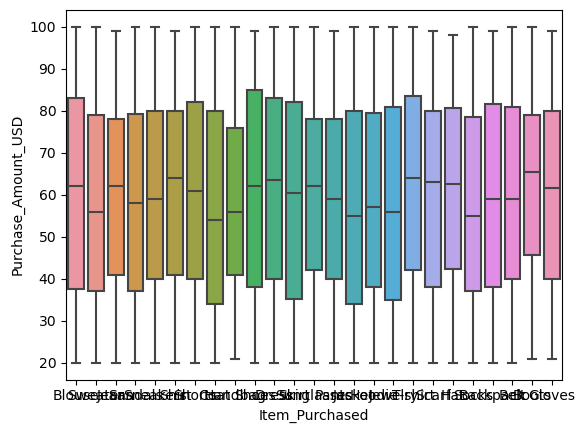

In [19]:
sns.boxplot(x='Item_Purchased',y='Purchase_Amount_USD',data=df)

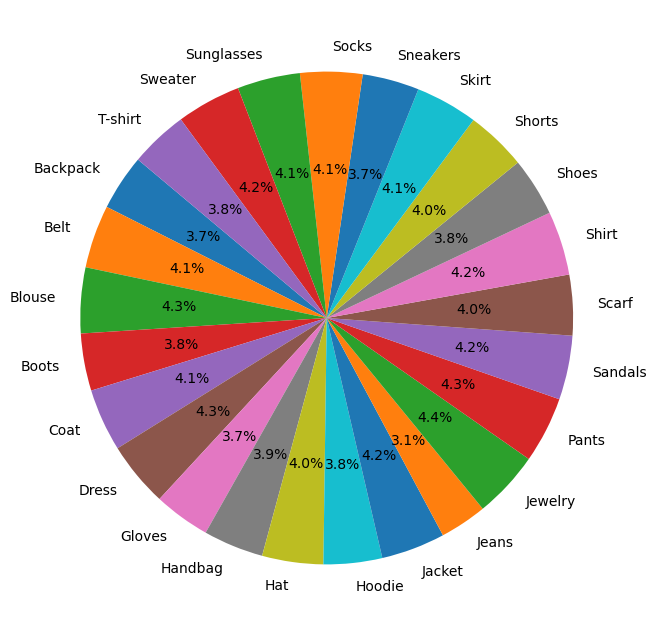

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns#to calculate Review_Rating for each item 

review_sales = df.groupby('Item_Purchased')['Review_Rating'].sum()

# نرسم Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(review_sales, labels=review_sales.index, autopct='%1.1f%%', startangle=140)


plt.show()


In [21]:
df.drop(columns='Customer_ID',inplace=True)

In [22]:
df.head()

,Age,Gender,Item_Purchased,Category,Purchase_Amount_USD,Location,Size,Color,Season,Review_Rating,Subscription_Status,Payment_Method,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Preferred_Payment_Method,Frequency_of_Purchases
0,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [10]:
most_item_review = df.groupby('Item_Purchased')[ 'Review_Rating'].max()
#most_common_review = review_counts.sort_values('count', ascending=False).drop_duplicates('Item_Purchased')
print(most_item_review)

Item_Purchased
Backpack      5.0
Belt          5.0
Blouse        5.0
Boots         5.0
Coat          5.0
Dress         5.0
Gloves        5.0
Handbag       5.0
Hat           5.0
Hoodie        5.0
Jacket        5.0
Jeans         5.0
Jewelry       5.0
Pants         5.0
Sandals       5.0
Scarf         5.0
Shirt         5.0
Shoes         4.9
Shorts        5.0
Skirt         5.0
Sneakers      5.0
Socks         5.0
Sunglasses    5.0
Sweater       5.0
T-shirt       5.0
Name: Review_Rating, dtype: float64


In [23]:
#check null value
df.isnull().sum()

Age                         0
Gender                      0
Item_Purchased              0
Category                    0
Purchase_Amount_USD         0
Location                    0
Size                        0
Color                       0
Season                      0
Review_Rating               0
Subscription_Status         0
Payment_Method              0
Shipping_Type               0
Discount_Applied            0
Promo_Code_Used             0
Previous_Purchases          0
Preferred_Payment_Method    0
Frequency_of_Purchases      0
dtype: int64

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3900.0,44.068462,15.207589,18.0,31.0,44.0,57.0,70.0
Purchase_Amount_USD,3900.0,59.764359,23.685392,20.0,39.0,60.0,81.0,100.0
Review_Rating,3900.0,3.749949,0.716223,2.5,3.1,3.7,4.4,5.0
Previous_Purchases,3900.0,25.351538,14.447125,1.0,13.0,25.0,38.0,50.0


In [25]:
#remove duplicate data
df.drop_duplicates()

,Age,Gender,Item_Purchased,Category,Purchase_Amount_USD,Location,Size,Color,Season,Review_Rating,Subscription_Status,Payment_Method,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Preferred_Payment_Method,Frequency_of_Purchases
0,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


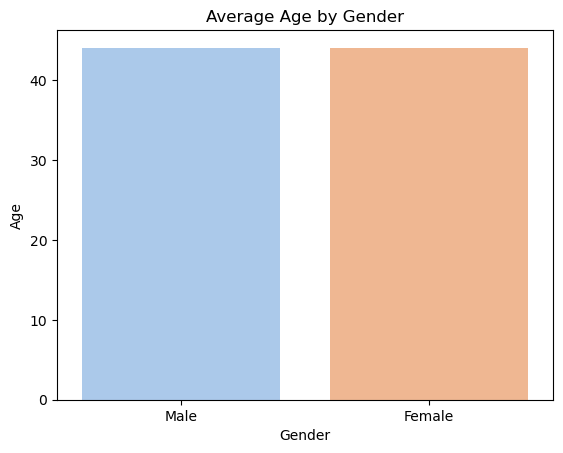

In [28]:
sns.barplot(x='Gender', y='Age', data=df, estimator='mean', ci=None, palette='pastel')
plt.title('Average Age by Gender')
plt.show()




In [29]:
mean_age_of_gender=df.groupby('Gender')['Age'].mean()

In [17]:
mean_age_of_gender

Gender
Female    44.007212
Male      44.097285
Name: Age, dtype: float64

<Axes: xlabel='Gender', ylabel='count'>

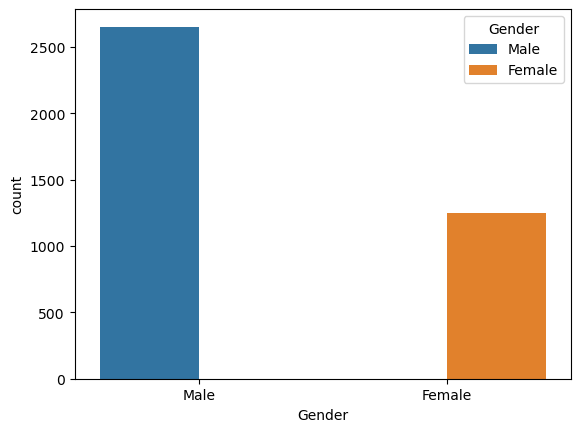

In [30]:
sns.countplot(x='Gender',data=df,hue='Gender')

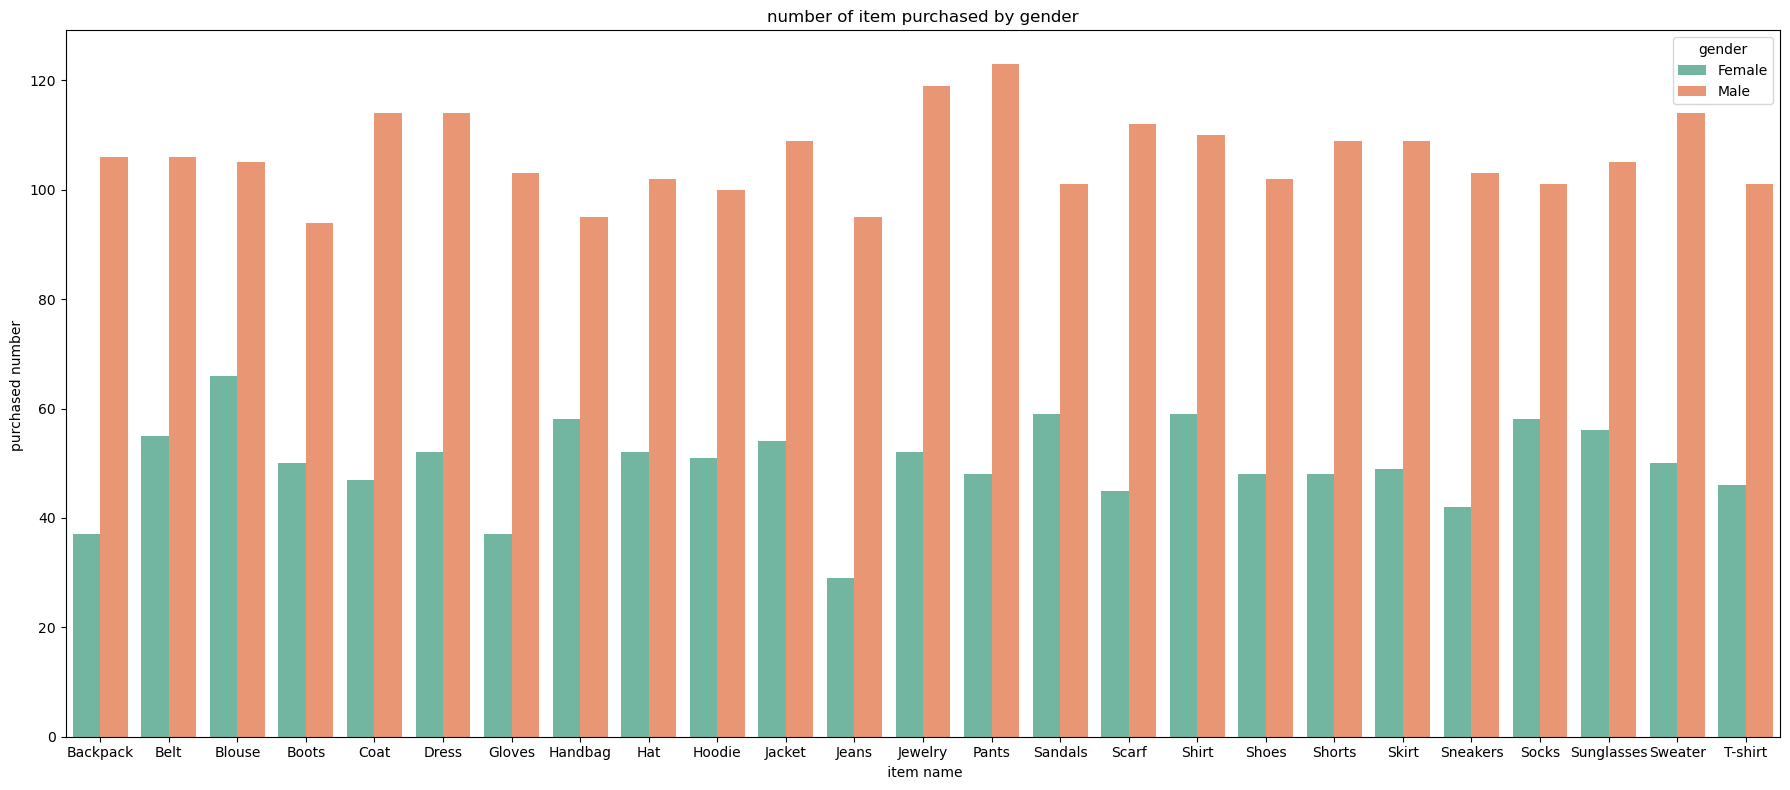

In [32]:
#This visualization shows the number of items purchased, broken down by gender.
# It helps identify which products are more popular among males and females.
grouped = df.groupby(['Item_Purchased', 'Gender']).size().reset_index(name='count')

   
plt.figure(figsize=(18, 8))
sns.barplot(data=grouped, x='Item_Purchased', y='count', hue='Gender', palette='Set2')

plt.title('number of item purchased by gender')
plt.xlabel(' item name')
plt.ylabel('purchased number ')
plt.legend(title='gender')
plt.tight_layout()
plt.show()


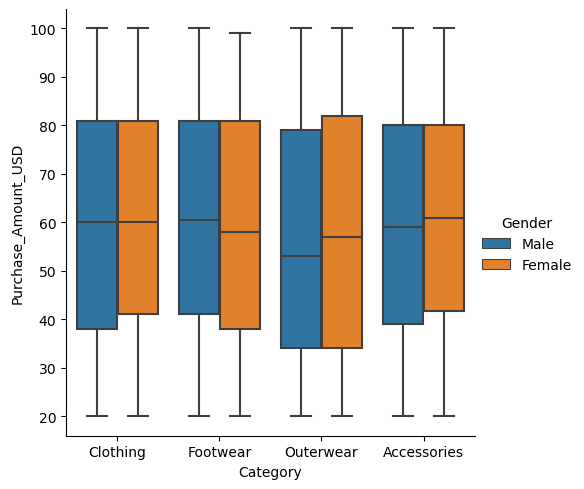

In [33]:
sns.catplot(data=df, x="Category", y="Purchase_Amount_USD", hue="Gender", kind="box")

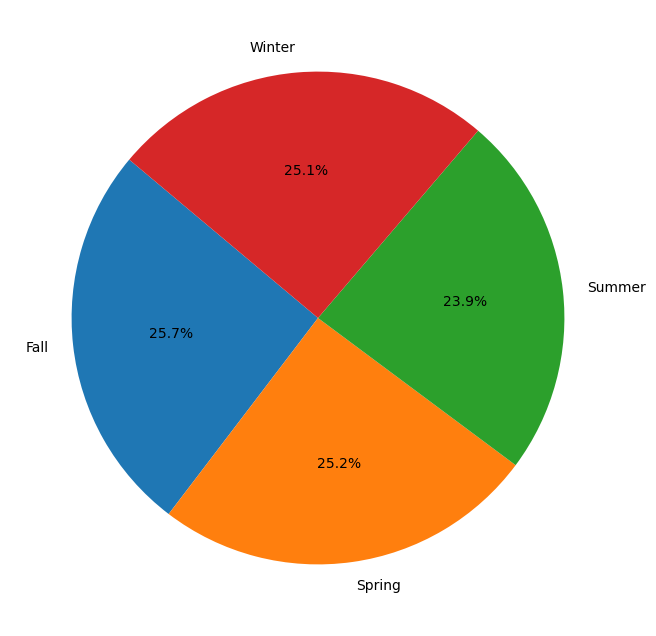

In [34]:
## This analysis aims to determine which season records the highest quantity of sales.

season_sales = df.groupby('Season')['Purchase_Amount_USD'].sum()

# نرسم Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(season_sales, labels=season_sales.index, autopct='%1.1f%%', startangle=140)


plt.show()


<Axes: xlabel='Category', ylabel='count'>

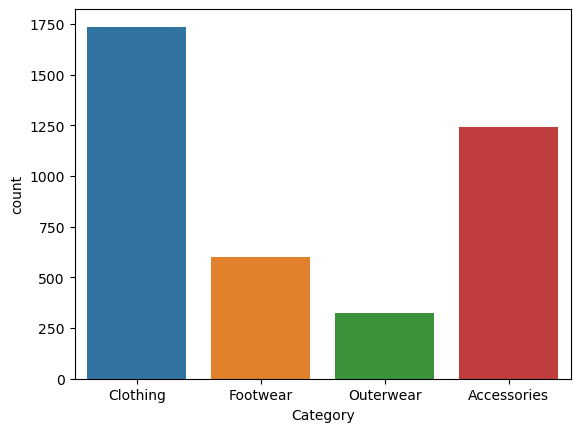

In [35]:
sns.countplot(x='Category',data=df)

In [60]:
 df['Color'].mode()

0    Olive
Name: Color, dtype: object

In [36]:
#to determine most common size foe each item
size_counts = df.groupby(['Item_Purchased', 'Size']).size().reset_index(name='count')
most_common_size = size_counts.sort_values('count', ascending=False).drop_duplicates('Item_Purchased')
print(most_common_size[['Item_Purchased', 'Size']])

   Item_Purchased Size
65          Shirt    M
41         Jacket    M
53          Pants    M
21          Dress    M
93        Sweater    M
49        Jewelry    M
1        Backpack    M
57        Sandals    M
9          Blouse    M
85          Socks    M
89     Sunglasses    M
29        Handbag    M
13          Boots    M
37         Hoodie    M
33            Hat    M
73         Shorts    M
77          Skirt    M
69          Shoes    M
25         Gloves    M
17           Coat    M
5            Belt    M
97        T-shirt    M
61          Scarf    M
81       Sneakers    M
45          Jeans    M


In [37]:
#to determine most common color for each category
color_counts = df.groupby(['Category', 'Color']).size().reset_index(name='count')
most_common_color = color_counts.sort_values('count', ascending=False).drop_duplicates('Category')
print(most_common_color[['Category', 'Color']])

       Category  Color
45     Clothing   Teal
13  Accessories  Olive
63     Footwear  Olive
88    Outerwear  Olive


In [38]:
color_counts = df.groupby(['Item_Purchased', 'Color']).size().reset_index(name='count')
most_common_color = color_counts.sort_values('count', ascending=False).drop_duplicates('Item_Purchased')
print(most_common_color[['Item_Purchased', 'Color']])

    Item_Purchased      Color
476          Skirt      Black
307        Jewelry       Gray
241         Hoodie       Pink
474         Shorts     Yellow
437          Shoes     Maroon
330          Pants       Cyan
367        Sandals     Purple
560     Sunglasses   Lavender
27            Belt       Blue
179        Handbag   Charcoal
97           Boots     Violet
580        Sweater       Cyan
397          Scarf     Violet
509       Sneakers     Indigo
129          Dress   Charcoal
72          Blouse     Violet
220            Hat       Teal
1         Backpack      Black
252         Jacket       Blue
622        T-shirt     Violet
412          Shirt     Maroon
171         Gloves  Turquoise
543          Socks        Red
122           Coat     Violet
295          Jeans       Teal


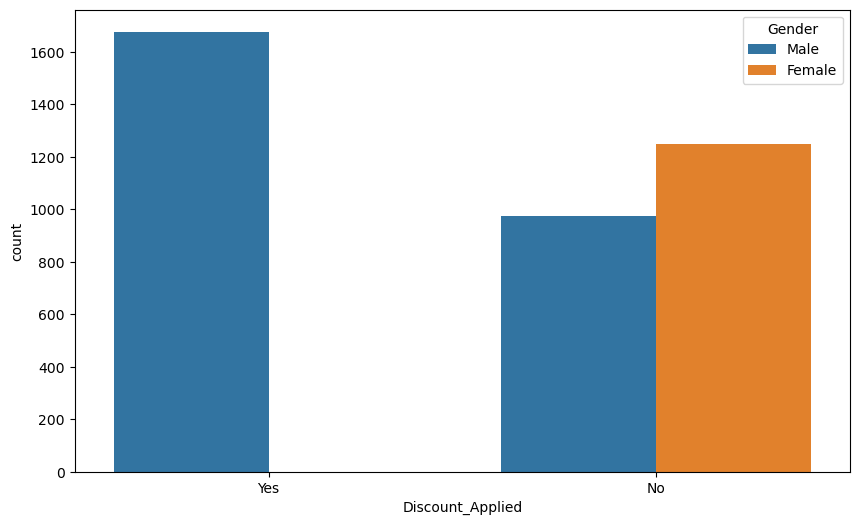

In [39]:
# This analysis aims to determine whether men or women are more interested in discounts.

plt.figure(figsize=(10, 6))
sns.countplot(x='Discount_Applied', data=df,hue='Gender')

plt.show()

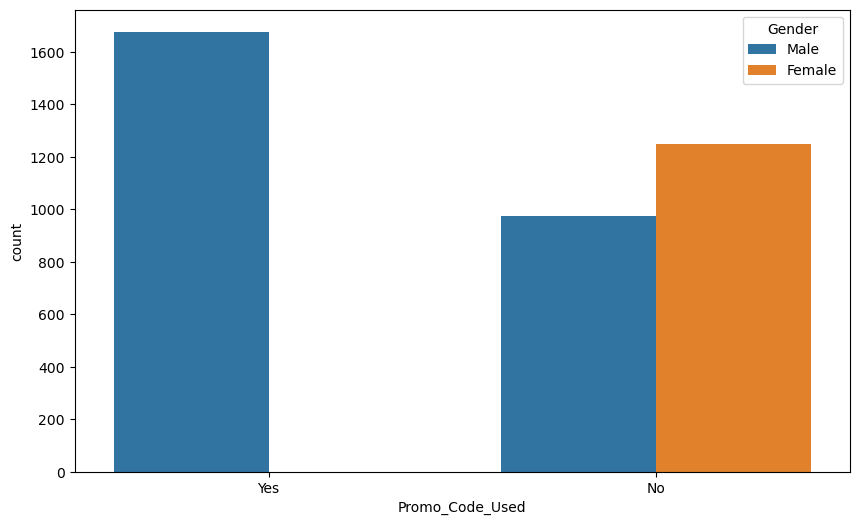

In [40]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Promo_Code_Used', data=df,hue='Gender')

plt.show()

<Axes: xlabel='Frequency_of_Purchases', ylabel='Purchase_Amount_USD'>

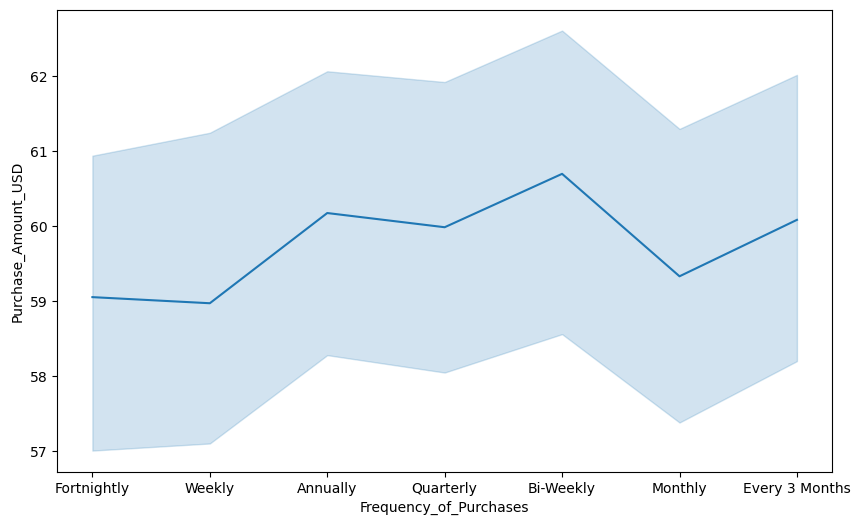

In [44]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Frequency_of_Purchases',y='Purchase_Amount_USD',estimator='mean',data=df)

<Axes: xlabel='Frequency_of_Purchases', ylabel='Age'>

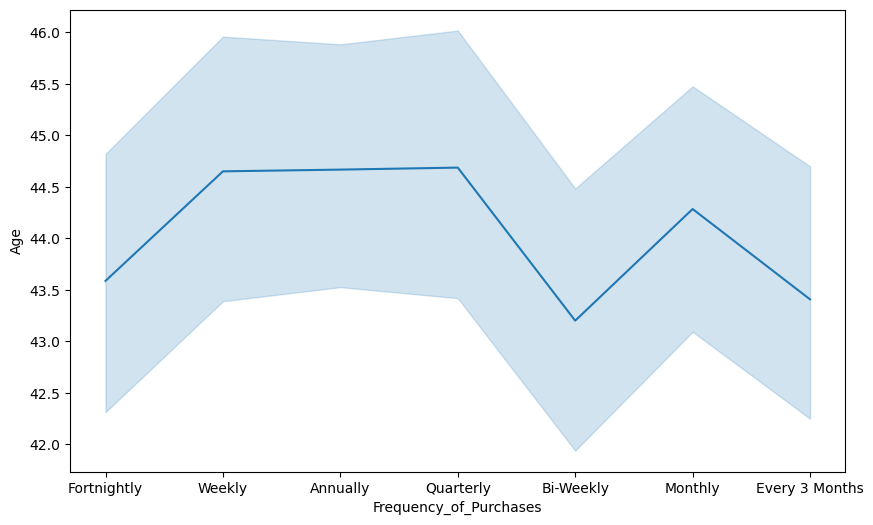

In [43]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Frequency_of_Purchases',y='Age',estimator='mean',data=df)

In [47]:
#encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Item_Purchased'] = le.fit_transform(df['Item_Purchased'])
df['Category'] = le.fit_transform(df['Category'])
df['Location'] = le.fit_transform(df['Location'])
df['Size'] = le.fit_transform(df['Size'])
df['Color'] = le.fit_transform(df['Color'])
df['Season'] = le.fit_transform(df['Season'])
df['Subscription_Status'] = le.fit_transform(df['Subscription_Status'])
df['Payment_Method'] = le.fit_transform(df['Payment_Method'])
df['Shipping_Type'] = le.fit_transform(df['Shipping_Type'])
df['Discount_Applied'] = le.fit_transform(df['Discount_Applied'])
df['Promo_Code_Used'] = le.fit_transform(df['Promo_Code_Used'])
df['Preferred_Payment_Method'] = le.fit_transform(df['Preferred_Payment_Method'])
df['Frequency_of_Purchases'] = le.fit_transform(df['Frequency_of_Purchases'])

In [48]:
df

,Age,Gender,Item_Purchased,Category,Purchase_Amount_USD,Location,Size,Color,Season,Review_Rating,Subscription_Status,Payment_Method,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Preferred_Payment_Method,Frequency_of_Purchases
0,55,1,2,1,53,16,0,7,3,3.1,1,2,1,1,1,14,5,3
1,19,1,23,1,64,18,0,12,3,3.1,1,0,1,1,1,2,1,3
2,50,1,11,1,73,20,2,12,1,3.1,1,1,2,1,1,23,2,6
3,21,1,14,2,90,38,1,12,1,3.5,1,4,3,1,1,49,4,6
4,45,1,2,1,49,36,1,21,1,2.7,1,1,2,1,1,31,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,40,0,9,1,28,45,0,21,2,4.2,0,1,0,0,0,32,5,6
3896,52,0,0,0,49,14,0,23,1,4.5,0,4,5,0,0,41,0,1
3897,46,0,1,0,33,29,0,8,1,2.9,0,2,4,0,0,24,5,5
3898,44,0,17,2,77,22,2,3,2,3.8,0,4,1,0,0,24,5,6
